In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from pathlib import Path

project_dir = Path("notebook.ipynb").resolve().parents[0]

In [61]:
total=0
for file in os.listdir(f'{project_dir}/data') :
    total+= 1
    print(f'Nome do arquivo: {file.lower()}')
print(f'Total de arquivos: {total}')

Nome do arquivo: energia_total_consumidores_2010_2018.csv
Nome do arquivo: pib_total_2010_2018.csv
Nome do arquivo: energia_total_2010_2018.csv
Nome do arquivo: taxa_aprovacao_ensino_medio_2010_2018.csv
Nome do arquivo: taxa_reprovacao_ensino_fundamental_2010_2018.csv
Nome do arquivo: populacao_total_2010.csv
Nome do arquivo: taxa_analfabetismo_maiores_quinze_anos_2010.csv
Nome do arquivo: taxa_reprovacao_ensino_medio_2010_2018.csv
Nome do arquivo: total_concluintes_ensino_fundamental_2010_2014.csv
Nome do arquivo: total_acesso_internet_2010_2018.csv
Nome do arquivo: arrecadacao_tributos_federais_2010_2015.csv
Nome do arquivo: taxa_abandono_ensino_medio_2010_2018.csv
Nome do arquivo: total_concluintes_ensino_medio_2010_2014.csv
Nome do arquivo: estimativa_total_populacao_2010_2018.csv
Nome do arquivo: pib_per_capita_2010_2018.csv
Nome do arquivo: tarifamediafornecimento.csv
Nome do arquivo: total_concluintes_ensino_superior_2010_2018.csv
Nome do arquivo: taxa_abandono_ensino_fundamenta

In [50]:
re.findall(r'^[A-Za-z_]*',file)[0][:-1]

'pib_per_capita'

In [33]:
teste = '2017 (R$)'
teste = re.sub(r'\W','',teste)
teste

'2017R'

In [44]:
print()

['pib_per_capita_']


# Criar um loop para preparar todos os dados que forem jogados na pasta '/data' e encapusular o loop em uma função
## Criar o dataset base fora do loop (mas dentro da função) e então criar o loop com os arquivos restantes (exemplo acima)

In [129]:
pib = pd.read_csv('data/pib_per_capita_2010_2018.csv', sep=';',decimal=',', skiprows=5, encoding='latin-1')
pib = pib.drop(columns=['latitude','longitude'])
for column in pib.columns[2:]:
    value = re.sub(r'\D*','',column)
    pib = pib.rename(columns={column:f'{value}'})

In [130]:
pib.columns

Index(['Município', 'ibge', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f735c531150>,
      dtype=object)

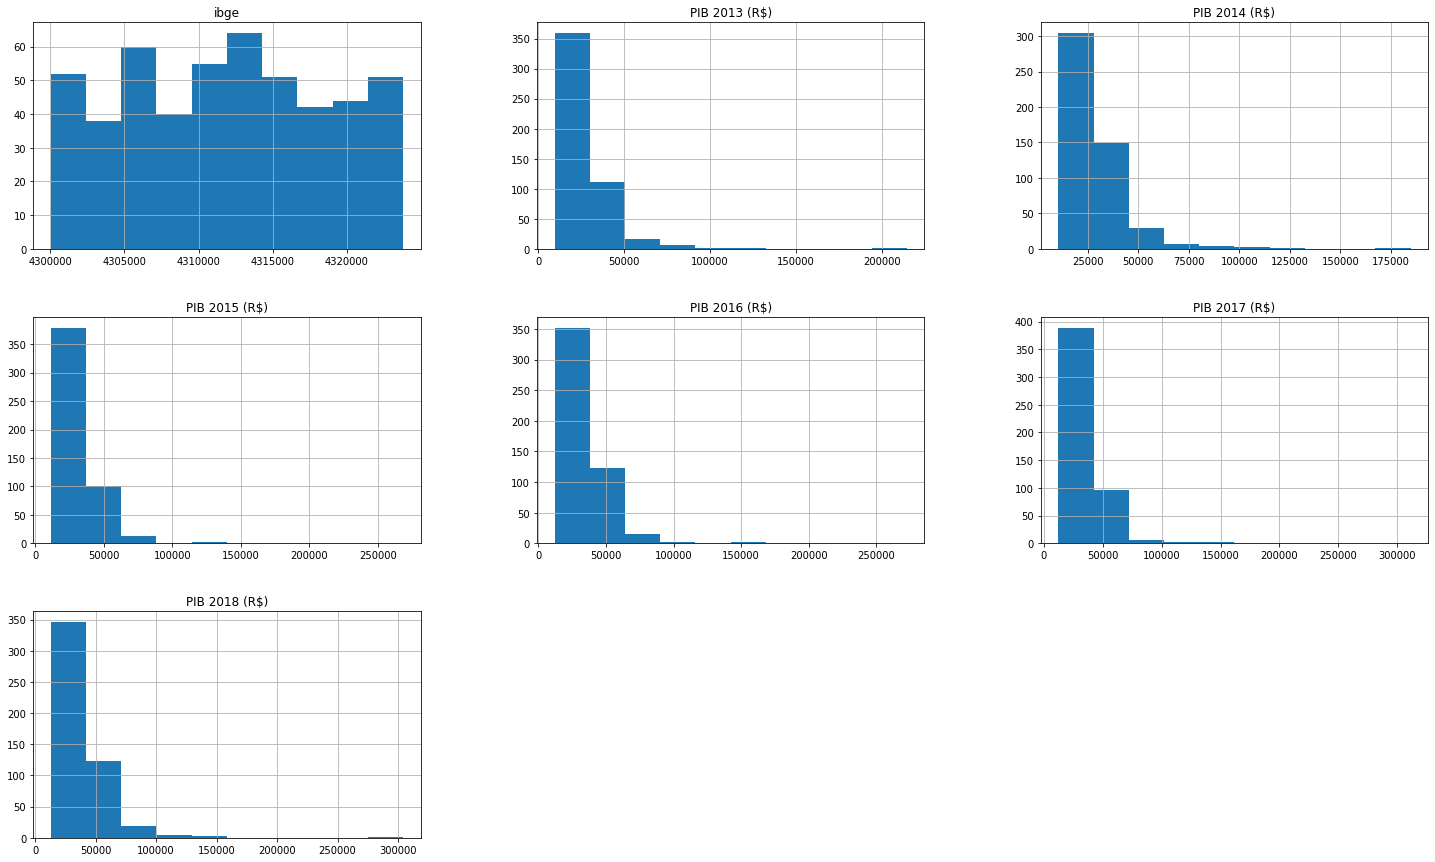

In [73]:
pib.hist(figsize=(25,15))

In [95]:
pib_melted = pib.melt(id_vars=['Município','ibge'], var_name=f'ANO_PIB', value_name='PIB')

In [96]:
pib_melted[pib_melted.Município.isin(['Pelotas','Porto Alegre','Alegrete'])]

,Município,ibge,ANO_PIB,PIB
5,Alegrete,4300406,2010,"13703,92"
310,Pelotas,4314407,2010,"12898,79"
325,Porto Alegre,4314902,2010,"30302,72"
502,Alegrete,4300406,2011,"14313,44"
807,Pelotas,4314407,2011,"16014,25"
822,Porto Alegre,4314902,2011,"34171,95"
999,Alegrete,4300406,2012,"16913,72"
1304,Pelotas,4314407,2012,"17412,93"
1319,Porto Alegre,4314902,2012,"38260,96"
1496,Alegrete,4300406,2013,19176.1


In [102]:
pib_melted[pib_melted.Município=='Pelotas']

,Município,ibge,ANO_PIB,PIB
310,Pelotas,4314407,2010,"12898,79"
807,Pelotas,4314407,2011,"16014,25"
1304,Pelotas,4314407,2012,"17412,93"
1801,Pelotas,4314407,2013,17489.3
2298,Pelotas,4314407,2014,19465.3
2795,Pelotas,4314407,2015,21558
3292,Pelotas,4314407,2016,23579.8
3789,Pelotas,4314407,2017,24894.7
4286,Pelotas,4314407,2018,25884.3
